<a href="https://colab.research.google.com/github/mehdi-lamrani/llm/blob/main/Youtube_Video_Transcript_Summarization_with_Hugging_Face_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [4]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"

In [5]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'A4OmtyaBHFE'

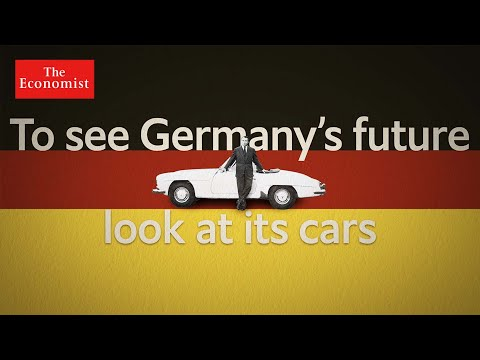

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [6]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [7]:
transcript[0:5]

[{'text': "for Germany it's the end of an era and",
  'start': 1.439,
  'duration': 5.46},
 {'text': "as Europe's biggest economy there are",
  'start': 4.859,
  'duration': 4.801},
 {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32},
 {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84},
 {'text': 'relationship with China to climate',
  'start': 11.219,
  'duration': 4.98}]

In [8]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9003


In [9]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [11]:
!ls ~/.cache/huggingface/hub

models--sshleifer--distilbart-cnn-12-6	version.txt


In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 for Germany it's the end of an era and as Europe's biggest economy there are some huge challenges ahead from its increasingly complex relationship with China to climate change all eyes will be on how Germany's new leaders grapple with these issues but there's one German industry that reveals a lot about the country's prospects it's cars traditionally the car industry here has been very powerful there have been open doors to German Ministries to the Chancery Germany's car industry is a vital part of its economy with links to government that go back decades how this world renowned motor industry navigates the challenges ahead could tell you more than you think about Germany's future [Music] the curves the Precision it's Cutting Edge engineering like this that has helped Place car makers at the heart of the German economy and the industry has proved of Bellwether for the country's future prospects too since the 70s car exports have risen with Germany's wealth and influence ma

Your max_length is set to 142, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Summarized text
 economist's assessment of Germany's future after Angela Merkel . Germany risks losing competitiveness throughout its economy . Germany has to do better right we have those very big companies this very big players here but they aren't the disruptor the driver behind in Innovation disruption comes always for me new Young companies which Drive change .
input text 
ibe
Summarized text
 ibe ibe. ibe . ibe is the world's first female president . She was elected to the U.S. Senate in 2008 . ibi is the first woman to hold a Senate seat in Congress to represent the nation's first black president . The U.N. Senate is the second chamber in the world to hold the chamber chamber .


In [ ]:
len(str(summarized_text))

4372

In [ ]:
str(summarized_text)

'[\' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .\', \' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\\\'t be the man I am today without the woman who agreed to marry me 20 years ago"\', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you\'ve done and all the incredible work that you put in . \'I know that political campaigns can sometimes seem small even silly and that provides plen